<a href="https://colab.research.google.com/github/0x1ana/Case-study-of-Decision-Tree-Classification-and-Random-Forest-Classification/blob/main/Statistics_Assignmet1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install --upgrade tensorflow


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 585.9/585.9 MB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 KB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.8/77.8 KB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.4/302.4 KB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 30.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 30.5 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.15.0
    Uninstalling wrapt-1.15.0:
      Successfully uninstalled wrapt-1.15.0
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.11.0
    Uninstalling tensorflow-estimator-2.11.0:
      Successfully uninstalled tensorf

In [ ]:
from __future__ import print_function
import pandas as pd
pd.__version__

'1.5.3'

In [ ]:
import os
os.getcwd()


'/content'

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#Loading a dataset into a dataframe
#Use describe(), info(), head() functions to get simple statistics and a description of the dataset
from google.colab.data_table import DataTable
DataTable.max_columns = 58
spam_dataset_dataframe = pd.read_csv("/content/gdrive/My Drive/spam.csv", sep = ',')
print('Dataset Loaded...')
spam_dataset_dataframe.describe()
#Use spam
#spam_dataset_dataframe.iloc[0:100]

Dataset Loaded...


,make,address,all,3d,our,over,remove,internet,order,mail,...,conference,semicol,paren,bracket,bang,dollar,pound,cap_avg,cap_long,cap_total
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.031869,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.285735,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,10.000000,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000


In [ ]:
#Use spam
#spam_dataset_dataframe.iloc[0:3]
#spam_dataset_dataframe['Class']=spam_dataset_dataframe['Class'].apply(lambda x: 1 if x=='spam' else 0)
#Use iloc to acces each row, index starts at 0
spam_dataset_dataframe.iloc[0:10]

#lot per feature histogram. figsize = (width, height)
#spam_dataset_dataframe.hist(bins = 100,figsize=(15,10))

,make,address,all,3d,our,over,remove,internet,order,mail,...,semicol,paren,bracket,bang,dollar,pound,cap_avg,cap_long,cap_total,Class
0,0.00,0.00,0.29,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.178,0.000,0.044,0.000,0.00,1.666,10,180,ham
1,0.46,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.125,0.000,0.000,0.000,0.00,1.510,10,74,ham
2,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.000,0.000,0.000,0.00,1.718,11,55,ham
3,0.33,0.44,0.37,0.0,0.14,0.11,0.00,0.07,0.97,1.16,...,0.006,0.159,0.000,0.069,0.221,0.11,3.426,72,819,spam
4,0.00,2.08,0.00,0.0,3.12,0.00,1.04,0.00,0.00,0.00,...,0.000,0.000,0.000,0.263,0.000,0.00,1.428,4,20,spam
5,0.00,0.00,0.27,0.0,0.81,0.81,0.00,2.98,0.54,0.81,...,0.000,0.040,0.000,0.565,0.121,0.00,1.617,18,131,spam
6,0.00,0.46,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.155,0.000,0.000,0.000,0.00,2.982,28,167,ham
7,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.138,0.000,0.000,0.00,1.228,4,43,ham
8,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.377,0.000,0.125,0.000,0.00,2.925,27,158,ham
9,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.000,0.000,0.000,0.00,4.333,11,13,ham


In [ ]:
spam_dataset_dataframe['Class']=spam_dataset_dataframe['Class'].apply(lambda x: 1 if x=='spam' else 0)
spam_dataset_dataframe.head()


,make,address,all,3d,our,over,remove,internet,order,mail,...,semicol,paren,bracket,bang,dollar,pound,cap_avg,cap_long,cap_total,Class
0,0.00,0.00,0.29,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.178,0.0,0.044,0.000,0.00,1.666,10,180,0
1,0.46,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.125,0.0,0.000,0.000,0.00,1.510,10,74,0
2,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.000,0.000,0.00,1.718,11,55,0
3,0.33,0.44,0.37,0.0,0.14,0.11,0.00,0.07,0.97,1.16,...,0.006,0.159,0.0,0.069,0.221,0.11,3.426,72,819,1
4,0.00,2.08,0.00,0.0,3.12,0.00,1.04,0.00,0.00,0.00,...,0.000,0.000,0.0,0.263,0.000,0.00,1.428,4,20,1


In [ ]:
print(spam_dataset_dataframe)

      make  address   all   3d   our  over  remove  internet  order  mail  \
0     0.00     0.00  0.29  0.0  0.00  0.00    0.00      0.00   0.00  0.00   
1     0.46     0.00  0.00  0.0  0.00  0.00    0.00      0.00   0.00  0.00   
2     0.00     0.00  0.00  0.0  0.00  0.00    0.00      0.00   0.00  0.00   
3     0.33     0.44  0.37  0.0  0.14  0.11    0.00      0.07   0.97  1.16   
4     0.00     2.08  0.00  0.0  3.12  0.00    1.04      0.00   0.00  0.00   
...    ...      ...   ...  ...   ...   ...     ...       ...    ...   ...   
4596  0.00     0.00  0.53  0.0  0.00  0.53    0.00      0.00   0.00  0.53   
4597  0.00     0.00  0.00  0.0  0.00  0.00    0.00      0.00   0.00  0.00   
4598  0.00     0.00  0.00  0.0  0.00  0.00    0.00      0.00   0.00  0.00   
4599  0.00     0.00  0.00  0.0  0.00  0.00    0.00      0.00   0.00  0.00   
4600  0.13     0.26  0.52  0.0  0.26  0.00    0.13      0.00   0.00  0.39   

      ...  semicol  paren  bracket   bang  dollar  pound  cap_avg  cap_long

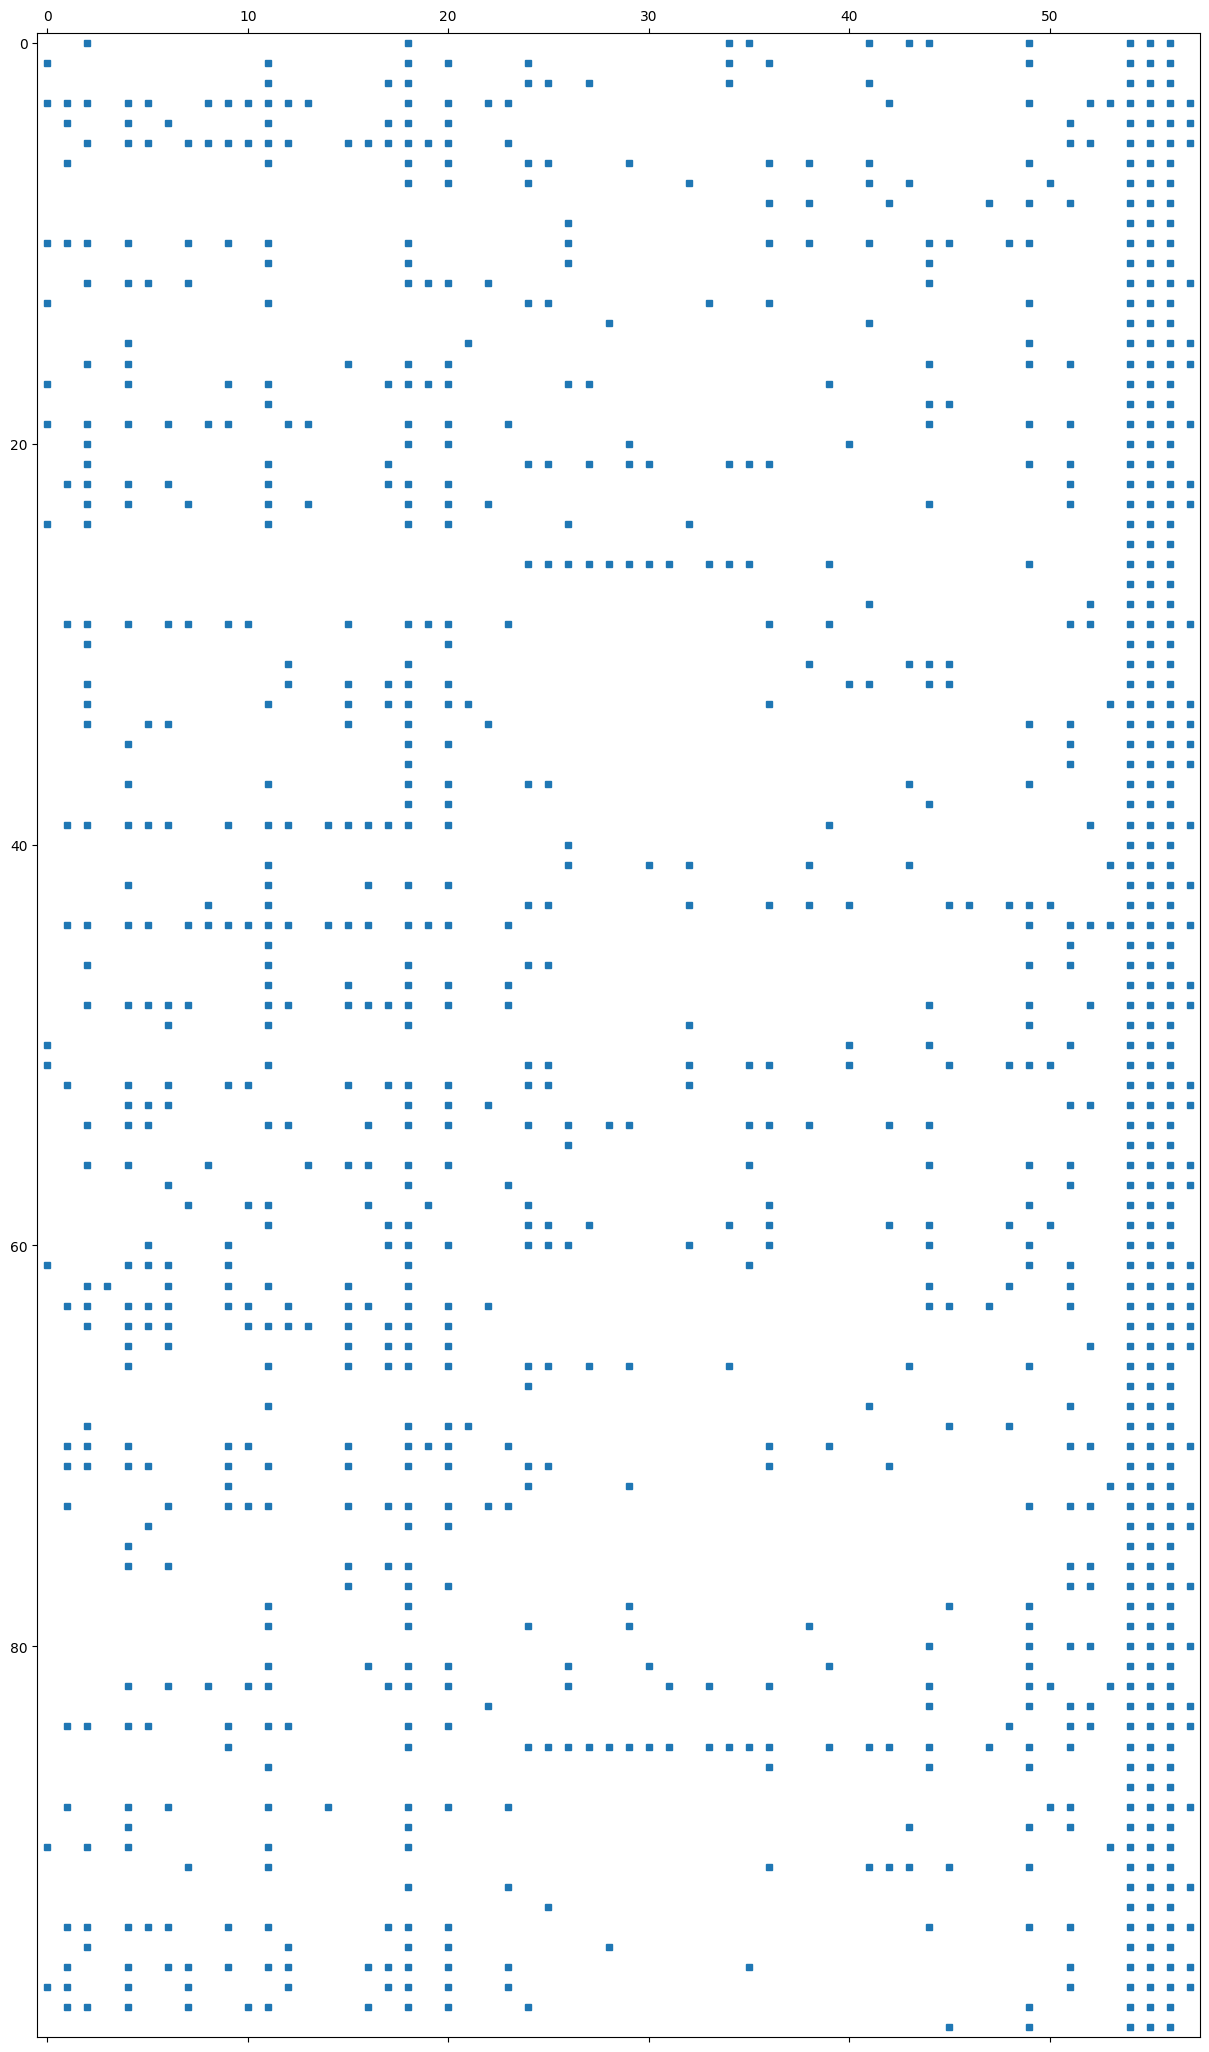

In [ ]:
# Visualising the Sparse Matrix

plt.figure(figsize=[15,30])
plt.title('')
plt.spy(spam_dataset_dataframe[:100].values, precision = 0.1, markersize = 5)
plt.show()

In [ ]:
import numpy as np

In [ ]:
#Define a function to create a training and test set.
#Takes dataframe and split ratio as input and outputs train and test datasets (dataframes)
def split_train_test(data,test_ratio):
  np.random.seed(42) # fix the seed if you want to generate the same
  shuffled_indices = np.random.permutation(len(data))
  test_set_size = int(len(data)*test_ratio)
  test_indices = shuffled_indices[:test_set_size]
  train_indices = shuffled_indices[test_set_size:]
  return data.iloc[train_indices], data.iloc[test_indices]

In [ ]:

from sklearn.model_selection import train_test_split

In [ ]:
#You can also use Scikit-Learn to create a training and test set.
#random_state parameter fixes the seed.
spam_training_set, spam_test_set = train_test_split(spam_dataset_dataframe, test_size=3601,random_state=42)
spam_dataset_dataframe.keys()
#spam_test_set.head()

Index(['make', 'address', 'all', '3d', 'our', 'over', 'remove', 'internet',
       'order', 'mail', 'receive', 'will', 'people', 'report', 'addresses',
       'free', 'business', 'email', 'you', 'credit', 'your', 'font', '0',
       'money', 'hp', 'hpl', 'george', '650', 'lab', 'labs', 'telnet', '857',
       'data', '415', '85', 'technology', '1999', 'parts', 'pm', 'direct',
       'cs', 'meeting', 'original', 'project', 're', 'edu', 'table',
       'conference', 'semicol', 'paren', 'bracket', 'bang', 'dollar', 'pound',
       'cap_avg', 'cap_long', 'cap_total', 'Class'],
      dtype='object')

In [ ]:
spam_training_data, spam_training_target = spam_training_set[["make", "address", "all","3d","our", "over", "remove", "internet", "order", "mail", "receive", "will", "people", "report", "addresses", "free", "business", "email", "you", "credit", "your", "font", "0", "money", "hp", "hpl", "george", "650", "lab", "labs", "telnet", "857", "data", "415", "85", "technology", "1999", "parts", "pm", "direct", "cs", "meeting", "original", "project", "re", "edu", "table", "conference", "semicol", "paren", "bracket", "bang", "dollar", "pound", "cap_avg", "cap_long", "cap_total" ]], spam_training_set["Class"]
spam_test_data, spam_test_target = spam_test_set[["make", "address", "all","3d","our", "over", "remove", "internet", "order", "mail", "receive", "will", "people", "report", "addresses", "free", "business", "email", "you", "credit", "your", "font", "0", "money", "hp", "hpl", "george", "650", "lab", "labs", "telnet", "857", "data", "415", "85", "technology", "1999", "parts", "pm", "direct", "cs", "meeting", "original", "project", "re", "edu", "table", "conference", "semicol", "paren", "bracket", "bang", "dollar", "pound", "cap_avg", "cap_long", "cap_total"]], spam_test_set["Class"]

spam_training_data.head()

,make,address,all,3d,our,over,remove,internet,order,mail,...,conference,semicol,paren,bracket,bang,dollar,pound,cap_avg,cap_long,cap_total
2190,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,1.082,0.0,0.000,0.000,0.216,3.478,7,80
4296,0.08,0.00,0.16,0.0,0.58,0.08,0.00,0.00,0.08,0.00,...,0.08,0.08,0.011,0.0,0.000,0.000,0.000,2.100,60,500
1046,0.00,0.00,0.00,0.0,1.21,0.00,1.21,1.21,1.21,1.21,...,0.00,0.00,0.000,0.0,0.555,0.000,0.000,104.666,311,314
1888,0.00,0.00,1.96,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.476,0.0,0.000,0.000,0.000,2.318,25,51
2469,0.29,0.19,0.68,0.0,0.00,0.58,0.00,0.58,0.58,0.77,...,0.00,0.00,0.034,0.0,0.569,0.207,0.034,12.064,691,1689


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style
from sklearn.metrics import confusion_matrix

criterion_DT = ["gini", "log_loss", "entropy"]
splitter_DT = ["best", "random"]
max_features_DT = ["sqrt", "log2"]
highest_accuracy_DT = 0
f = ""
g = ""
h = ""

for x in max_features_DT:
  for n in criterion_DT:
    for z in splitter_DT:
      clf = DecisionTreeClassifier(criterion = n, max_features = x, splitter= z, random_state = 101)
      clf.fit(spam_training_data,spam_training_target)
      spam_test_target_predict=clf.predict(spam_test_data)
      print("For criterion_DT = ",n,", and max_features_DT = ", x , "and splitter_DT = ", z, "the accuracy score is: ", accuracy_score(spam_test_target,spam_test_target_predict))

      if accuracy_score(spam_test_target,spam_test_target_predict) > highest_accuracy_DT:
        highest_accuracy_DT = accuracy_score(spam_test_target,spam_test_target_predict)
        f = str(n)
        g = str(x)
        h = str(z)

print("The decision tree with the highest accuracy ",highest_accuracy_DT, "has the following parameters: criterion_DT = ", f, " max_features_DT = ", g, "splitter_DT = ", h)

#clf = RandomForestClassifier(n_estimators=10, max_features="sqrt", random_state = 101)
#clf = DecisionTreeClassifier(criterion = "entropy", random_state = 101, max_features = )
clf1 = DecisionTreeClassifier(criterion = f, max_features = g, splitter = h, random_state = 101)

#clf = KNeighborsClassifier(n_neighbors=3)
#clf = AdaBoostClassifier(n_estimators = 200)
#LRI = LogisticRegression( )
#clf = AdaBoostClassifier(n_estimators = 200,base_estimator=LRI)
clf1.fit(spam_training_data,spam_training_target)


#spam_test_target_predict=clf.predict(spam_test_data)
#confusion_matrix(spam_test_target,spam_test_target_predict)
#classification_report(spam_test_target,spam_test_target_predict)
accuracy_score(spam_test_target,spam_test_target_predict)

#spam_test_target_predict=clf.predict(spam_test_data)
c_m = confusion_matrix(spam_test_target,spam_test_target_predict)
c_r = classification_report(spam_test_target,spam_test_target_predict)
a_s = accuracy_score(spam_test_target,spam_test_target_predict)


# Compare observed value and Predicted value
print("Prediction for 10 observation:    ",clf.predict(spam_test_data[0:20]))
print("Actual values for 10 observation: ",spam_test_target[0:20].values)
print(c_m)
print(c_r)
print(a_s)



For criterion_DT =  gini , and max_features_DT =  sqrt and splitter_DT =  best the accuracy score is:  0.8780894196056651
For criterion_DT =  gini , and max_features_DT =  sqrt and splitter_DT =  random the accuracy score is:  0.8636489863926687
For criterion_DT =  log_loss , and max_features_DT =  sqrt and splitter_DT =  best the accuracy score is:  0.8761455151346849
For criterion_DT =  log_loss , and max_features_DT =  sqrt and splitter_DT =  random the accuracy score is:  0.8525409608442099
For criterion_DT =  entropy , and max_features_DT =  sqrt and splitter_DT =  best the accuracy score is:  0.8761455151346849
For criterion_DT =  entropy , and max_features_DT =  sqrt and splitter_DT =  random the accuracy score is:  0.8525409608442099
For criterion_DT =  gini , and max_features_DT =  log2 and splitter_DT =  best the accuracy score is:  0.8597611774507081
For criterion_DT =  gini , and max_features_DT =  log2 and splitter_DT =  random the accuracy score is:  0.8542071646764787
Fo

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style
from sklearn.metrics import confusion_matrix

n_estimators = [10, 50, 100, 500, 1000, 5000]
max_features = ["sqrt", "log2", None]
highest_accuracy = 0
a = 0
b = ""

for x in max_features:
  for n in n_estimators:
    clf = RandomForestClassifier(n_estimators = n, max_features = x, random_state = 101)
    clf.fit(spam_training_data,spam_training_target)
    spam_test_target_predict=clf.predict(spam_test_data)
    print("For no_estimators = ",n,", and max_fetures = ", x , "the accuracy score is: ", accuracy_score(spam_test_target,spam_test_target_predict))

    if accuracy_score(spam_test_target,spam_test_target_predict) > highest_accuracy:
      highest_accuracy = accuracy_score(spam_test_target,spam_test_target_predict)
      a = n
      b = x

print("The random forest with the highest accuracy ",highest_accuracy, "has the following parameters: n_estimators = ", a, " and max_features = ", b)
clf = RandomForestClassifier(n_estimators = a, max_features = b, random_state = 101)
#clf = DecisionTreeClassifier(criterion = "entropy")
clf.fit(spam_training_data,spam_training_target)


spam_test_target_predict=clf.predict(spam_test_data)
c_m = confusion_matrix(spam_test_target,spam_test_target_predict)
c_r = classification_report(spam_test_target,spam_test_target_predict)
a_s = accuracy_score(spam_test_target,spam_test_target_predict)


# Compare observed value and Predicted value
print("Prediction for 10 observation:    ",clf.predict(spam_test_data[0:20]))
print("Actual values for 10 observation: ",spam_test_target[0:20].values)
print(c_m)
print(c_r)
print(a_s)

For no_estimators =  10 , and max_fetures =  sqrt the accuracy score is:  0.918911413496251
For no_estimators =  50 , and max_fetures =  sqrt the accuracy score is:  0.9266870313801722
For no_estimators =  100 , and max_fetures =  sqrt the accuracy score is:  0.9311302415995557
For no_estimators =  500 , and max_fetures =  sqrt the accuracy score is:  0.9316856428769786
For no_estimators =  1000 , and max_fetures =  sqrt the accuracy score is:  0.9341849486253818
For no_estimators =  5000 , and max_fetures =  sqrt the accuracy score is:  0.9355734518189391
For no_estimators =  10 , and max_fetures =  log2 the accuracy score is:  0.928353235212441
For no_estimators =  50 , and max_fetures =  log2 the accuracy score is:  0.9369619550124966
For no_estimators =  100 , and max_fetures =  log2 the accuracy score is:  0.9411274645931685
For no_estimators =  500 , and max_fetures =  log2 the accuracy score is:  0.9364065537350736
For no_estimators =  1000 , and max_fetures =  log2 the accuracy

<Axes: >

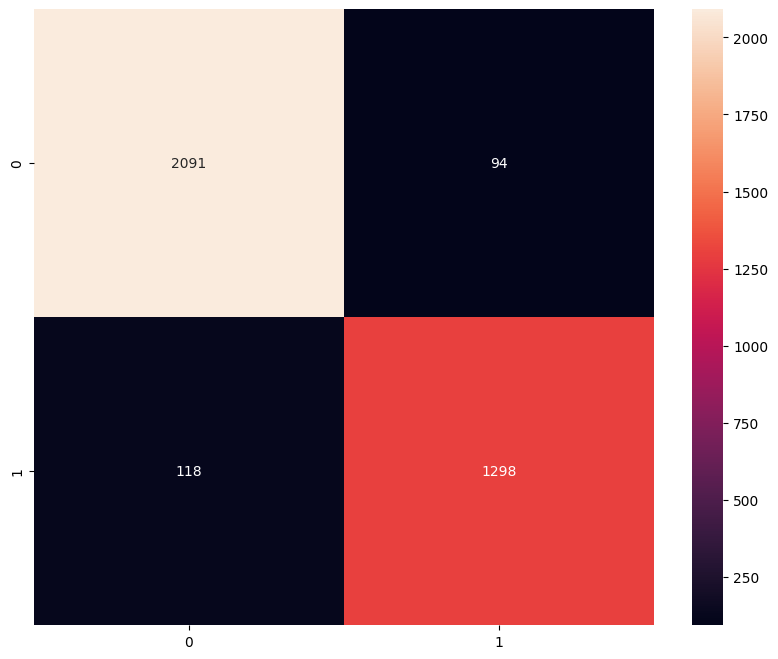

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(c_m,annot=True,fmt='d')